# Assignment 3: Data Mining and Analysis
## Deadline: *May 26, 2019 by midnight*
## IMT 547 - Social Media Data Mining and Analysis

### Student Name: Manas Tripathi
### Collaborator(s): Vishal Khatri and Apurva Mehta

In this assignment, you will practice the concepts and techniques of social media analysis that you've learned from this course. Part 1 and Part 2 will focus on content-based analysis. My best guess is that Part 1 is medium difficult. You will be asked to perform exploratory data analysis to answer questions related to movie ratings and box office success. Part 2 perhaps requires a longer time and more efforts where you will be asked to develop a machine learning model (Naive Bayes classifier) to classify movie ratings to be Rotten or Fresh based on their reviews. Part 3 is relatively simple and short. You will be asked to examine the structure of networks and discuss network properties.

There are also a couple of extra-credit questions. As usual, you are recommended to start as early as possible. You might get stuck somewhere, so you want to get stuck early and manage to figure them out. Try to make attempts to every question because you can still get partial points for your good efforts. Don't leave blanks!

You will use the following packages for this assignment:

In [23]:
# data analysis
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# You can import other packages if necessary
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import math
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## Part 1 - Exploring Movie Data (16 pts)

In this part, we will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

You will perform two pieces of exploratory data analysis. **Extra credits ($\leq$ 4 pts)** may apply to the cases in which students have shown exceptional efforts in proposing a well-defined EDA plan, conducting a thorough EDA, creating great visualizations to support their analysis, etc.

If you are not familiar with the Rotten Tomatoes or IMDB, go spend some time to explore the websites. Here is an example movie page on the Rotten Tomatoes: https://www.rottentomatoes.com/m/the_theory_of_everything_2014

In [2]:
# Load the data
movies = pd.read_csv('a3-movies.csv')

In [3]:
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

### 1.1. Box Office Success (8 pts)

One of the overarching question would be: **what factors are associated with the box office success of movies?**

To answer this question, *think about your EDA plan carefully:* 
* What does the dataset look like? 
* What variables are you going to examine, and how? 
* What hypothese do you have?
* Are there any concerns or limitations of your analysis?

Please describe your detailed EDA strategies in words, then perform the proposed EDA and finally discuss your results. 

**Remember the key to a great EDA is often to create nice visualizations to explore the questions!**

**Step 1. Your EDA plan:**
Before carrying out any analysis, let us first define what box office success means. In my analysis, I am going to consider a movie as a "box-office success" if the revenue generated by the movie is 40% more than the production Budget. I will create a new column (revenue generated) which is worldwide gross minus production budget, and then we will study the factors that are associated with the revenue generated column.


In [4]:
# Step 2. Your codes for EDA
#let's see the data
movies.head()

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


In [5]:
# shape of the movies data
print(movies.shape)

(2449, 31)


In [6]:
def cleanData(columns):
    for column in columns:
        movies[column].replace(r'\\N', np.NaN, regex = True, inplace = True)
        movies[column].replace(r'Unknown', np.NaN, regex = True, inplace = True)

columns_to_clean = ['rtAllCriticsRating', 'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten',
'rtAllCriticsScore', 'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh', 'rtTopCriticsNumRotten',
'rtTopCriticsScore', 'rtAudienceRating', 'rtAudienceNumRatings', 'rtAudienceScore', 'US DVD Sales', 'Worldwide Gross', 'US Gross', 'Production Budget',
'IMDB Rating', 'IMDB Votes']

cleanData(columns_to_clean)

In [7]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def toFloat(value):
    if(isfloat(value)):
        return float(value)
    else:
        return value

In [8]:
movies[columns_to_clean].applymap(toFloat)
movies.dtypes

id                          int64
title                      object
imdbID                      int64
year                        int64
rtID                       object
rtAllCriticsRating         object
rtAllCriticsNumReviews     object
rtAllCriticsNumFresh       object
rtAllCriticsNumRotten      object
rtAllCriticsScore          object
rtTopCriticsRating         object
rtTopCriticsNumReviews     object
rtTopCriticsNumFresh       object
rtTopCriticsNumRotten      object
rtTopCriticsScore          object
rtAudienceRating           object
rtAudienceNumRatings       object
rtAudienceScore            object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
IMDB Rating   

In [9]:
# adding a new column to the dataframe (revenue generated) which is worldwide gross - production budget. We need to change
# the dtype of worldwide gross to int from str to carry on with the calculation.
def replacewithmedian(columns):
    for column in columns:
        value_to_fill = movies[column].median()
        movies[column].fillna(value = value_to_fill, axis = 0, inplace = True)

def convertToFloat(columns):
    for column in columns:
        movies[column] = movies[column].astype('float64')

replacewithmedian(columns_to_clean)
convertToFloat(columns_to_clean)

movies.describe()


,id,imdbID,year,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,...,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time (min),IMDB Rating,IMDB Votes
count,2449.000000,2.449000e+03,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2.449000e+03,2449.000000,2.449000e+03,2.449000e+03,2.449000e+03,2.449000e+03,998.00000,2449.000000,2449.000000
mean,12459.585953,2.566623e+05,1996.589220,5.466354,81.999183,46.137199,35.776644,52.301347,4.533687,18.763577,...,3.017395,3.785029e+04,59.403838,4.627902e+07,8.785536e+07,2.497124e+07,3.204847e+07,110.97996,6.320171,32653.183544
std,18109.348087,2.038365e+05,12.736148,1.994245,59.377455,45.809102,33.872037,29.884989,2.626366,13.491072,...,0.985653,9.670196e+04,24.024205,5.950898e+07,1.403048e+08,2.082202e+07,3.437930e+07,20.65234,1.219926,46182.046687
min,1.000000,4.972000e+03,1915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,46.00000,1.600000,18.000000
25%,2082.000000,1.134630e+05,1995.000000,4.400000,33.000000,12.000000,8.000000,27.000000,3.300000,6.000000,...,2.900000,3.212000e+03,48.000000,8.355815e+06,1.105271e+07,2.240125e+07,8.000000e+06,95.00000,5.600000,6872.000000
50%,4254.000000,1.959450e+05,2000.000000,5.700000,66.000000,31.000000,24.000000,54.000000,5.100000,18.000000,...,3.200000,1.172700e+04,64.000000,2.584990e+07,3.556828e+07,2.240125e+07,2.000000e+07,108.00000,6.400000,18024.500000
75%,7450.000000,3.607170e+05,2004.000000,6.900000,127.000000,64.000000,57.000000,79.000000,6.500000,31.000000,...,3.600000,3.615400e+04,77.000000,5.962396e+07,1.038914e+08,2.240125e+07,4.500000e+07,122.00000,7.200000,39003.000000
max,64957.000000,1.213644e+06,2011.000000,9.400000,281.000000,265.000000,171.000000,100.000000,9.400000,48.000000,...,4.500000,1.768593e+06,98.000000,6.007882e+08,1.842880e+09,3.525821e+08,3.000000e+08,222.00000,9.200000,519541.000000


In [10]:
movies['revenueGenerated'] = movies['Worldwide Gross'] - movies['Production Budget']

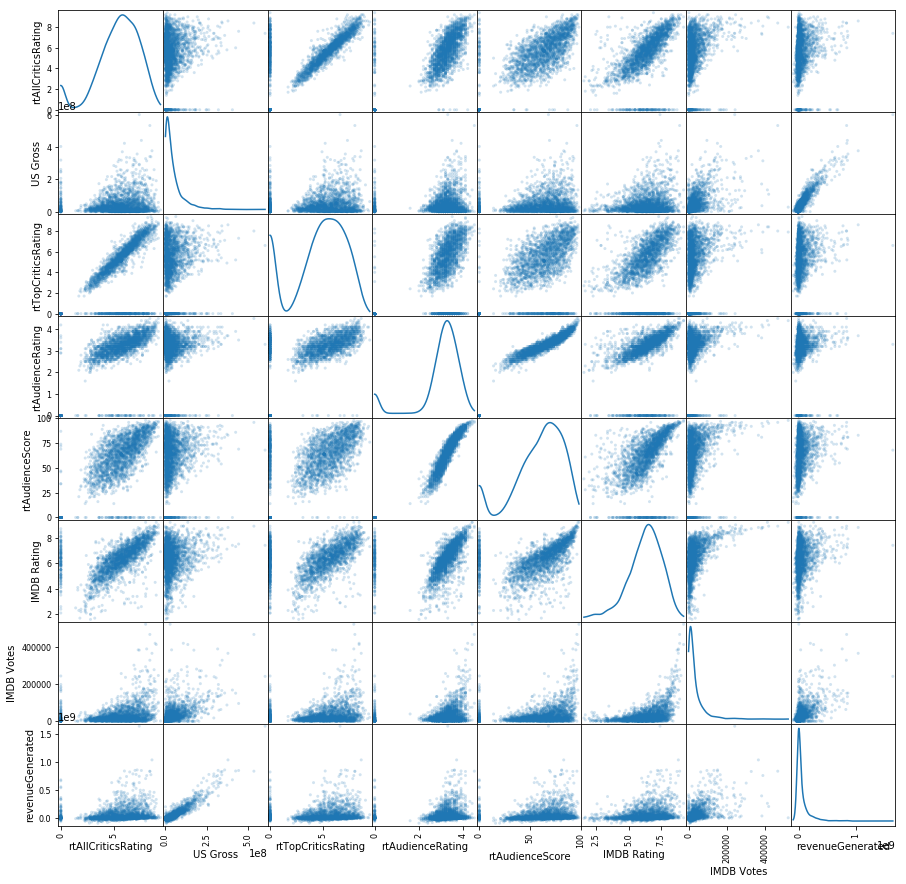

In [11]:
movies_subset = movies[['rtAllCriticsRating', 'US Gross', 'rtTopCriticsRating', 'rtAudienceRating', 'rtAudienceScore', 'IMDB Rating', 'IMDB Votes', 'revenueGenerated']] 

scatter_matrix_plot = scatter_matrix(movies_subset, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [12]:
# Let's check the correlation between variables to find which variables are strongly correlated with revenue generated.
movies_subset.corr()

,rtAllCriticsRating,US Gross,rtTopCriticsRating,rtAudienceRating,rtAudienceScore,IMDB Rating,IMDB Votes,revenueGenerated
rtAllCriticsRating,1.000000,0.115599,0.613161,0.685824,0.721835,0.582107,0.267528,0.154505
US Gross,0.115599,1.000000,0.158089,0.089580,0.149292,0.179667,0.551844,0.922372
rtTopCriticsRating,0.613161,0.158089,1.000000,0.564664,0.562044,0.383782,0.272711,0.167335
rtAudienceRating,0.685824,0.089580,0.564664,1.000000,0.930118,0.341491,0.201590,0.110153
rtAudienceScore,0.721835,0.149292,0.562044,0.930118,1.000000,0.500955,0.300776,0.171775
IMDB Rating,0.582107,0.179667,0.383782,0.341491,0.500955,1.000000,0.483048,0.221822
IMDB Votes,0.267528,0.551844,0.272711,0.201590,0.300776,0.483048,1.000000,0.561089
revenueGenerated,0.154505,0.922372,0.167335,0.110153,0.171775,0.221822,0.561089,1.000000


**We see that the variables US Gross and IMDB votes have a good positive correlation with the revenueGenerated variable, while the other variables are not substantially correlated.**

In [13]:
movies.Source.unique()

array(['Original Screenplay', 'Based on Book/Short Story', 'Remake',
       'Based on Real Life Events', 'Based on Play',
       'Based on Short Film', 'Based on Game', 'Based on TV',
       'Traditional/Legend/Fairytale', 'Based on Comic/Graphic Novel',
       nan, 'Based on Musical/Opera', 'Compilation',
       'Based on Magazine Article', 'Spin-Off', 'Disney Ride',
       'Based on Toy'], dtype=object)

Step 3. **Discussion:** We saw that the US Gross and IMDB votes have a good positive correlation with the revenueGenerated variable. However, there are limitations to our analysis. We have only considered continuous variables as factors. There are categorical variables such as Movie genre, Source, Directors that could also determine if a movie will be a box office success. 

### 1.2. Consistency between movie ratings (8 pts)

Next, we will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

**Step 1. Your EDA plan:** I will consider the columns rtAllCriticsRating and rtAudienceRating to compare the moview ratings. However, both these ratings are on a different scale. rtAllCriticsRating is on a scale 0-10 and rtAudienceRating is on the scale 0- 5. Therefore, we need to normalize these columns so that we can compare them. 

In [14]:
def normalize(data, listOfColumnsToNormalize):
    for column in listOfColumnsToNormalize:
        max_value = data[column].max()
        min_value = data[column].min()
        data['normalized_' + column] = (data[column] - min_value) / (max_value - min_value)

normalize(movies, ['rtAllCriticsRating', 'rtAudienceRating'])

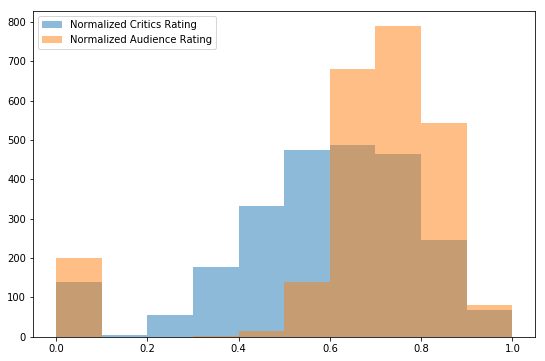

In [15]:
#plot of histogram
bins = np.linspace(0.0, 1.0, num = 11)
plt.figure(figsize=(9,6))
plt.hist(movies['normalized_rtAllCriticsRating'], bins, alpha=0.5, label='Normalized Critics Rating')
plt.hist(movies['normalized_rtAudienceRating'], bins, alpha=0.5, label='Normalized Audience Rating')
plt.legend(loc='upper left')
plt.show()

**Step 3. Discussion:** From the overlapping histogram, we can see that the frequency of ratings by Rotten Tomatotes audience is more than the ratings of critics. Overall, the audience tend to rate a movie higher than the critics. This could be due to the fact that critics like to rate a movie by considering many technical factors like movie plot, direction, climax, cinematography that might not be understood/considered by general audience. Also, people can be biased towards their favorite actor/director and might end up rating a movie higher. A critic is generally neutral.

## Part 2 - Analyzing Movie Reviews* (20 pts)

*This part is adapted from INFX 574 - Core Methods in Data Science Problem Set 5.

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review. I have imported the dataset for you.

In [16]:
# Import movie reviews data
reviews = pd.read_csv("a3-reviews.csv")

### 2.1 Text Cleaning and Unigram Representation (5 pts)

Before we get into the text classification, let's spend some time work with the reviews text! 

Are the reviews clean enough to you? As we will use bag-of-words representation here, we want to reduce the sparse representation. In this part, you will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, you will tokenize the reviews; in other words, you are going to convert your text fields into "bag of words" vectors.
One thing that may help you in the following problems is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Make sure you read the function documentation and review the lab demos to understand how the process goes. Eventually, you will get a bag-of-words array from your reviews data. Name your complete feature set as X and your target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to your model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from your model.

In [17]:
# Your codes here - for text cleaning & tokenizing
# drop none from the reviews dataset
le = preprocessing.LabelEncoder()
reviews['fresh'].replace(r'none', np.NaN, regex = True, inplace = True)
reviews = reviews[pd.notna(reviews['fresh'])]

In [18]:
le.fit(reviews['fresh'].unique())
le.classes_ = ['rotten', 'fresh']
encoded_target = pd.Series(le.transform(reviews['fresh']))
reviews = reviews.assign(target=encoded_target.values)

In [19]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(reviews['quote'])
X = X.toarray()

### 2.2 Train-Test Split (5 pts)

Next, randomly split the data into a training set (67%) and a test set (33%).  One function that may be very helpful is [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Read the documentation and our previous lab demos to understand how the function works.

Name the training set as **X_train** and the corresponding labels as **Y_train**; similarly, name the test set as **X_test** and their labels as **Y_test**.

In [20]:
# Your codes here - for train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, reviews['target'], test_size=0.33, random_state=48)

### 2.3 Extra Credits ($\leq$ 4 pts): Tuning Hyperparameters

We want to use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

That calling MultinomialNB() allows us to create a default NB model. However, we often need to tune the hyperparameters of the model for a better performance. Remember the technique for hyperparameters tuning we talked about previously? Cross validation!

The two most important hyperparameters are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters. The objective function we want to maximize is the **log-likelihood** of our data (the function provided below).  Fill in the remaining code in the block below, to loop over many values of `alpha` and `min_df` to determine which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, [`sklearn.model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), that might save you a lot of time here...*

In [21]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(fitted_model, x, y):
    prob = fitted_model.predict_log_proba(x)
    #find rotten or fresh in the target
    rotten = y == 0
    fresh = ~rotten
    #the first column of prob indicates the log likelihood of being rotten, while the second ... being fresh
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [55]:
#Now it's your turn to find the "best" value for alpha and min_df among these candidates using cross validation

#suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# 0. tokenize the reviews with the current min_df value
# 1. split the training set into a (k-1) folds training and the remaining fold to be the validation set
# 2. create a NB model using the current alpha candidate
# 3. run k-fold crossvalidation and specify log_likelihood function to be the scoring method
# 4. compare the current performance to the best performance "so far". If greather than the record, update them!
# Finally, report the "best" value for alpha and min_df


alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# initialize
best_alpha = None
best_min_df = None
best_Score = -np.inf

for alpha in alphas:
    for min_df in min_dfs:
        vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=min_df)
        X = vectorizer.fit_transform(reviews['quote']).toarray()
        X_train, X_test, Y_train, Y_test = train_test_split(X, reviews['target'], test_size=0.3, random_state =48)
        fitted_model = MultinomialNB(alpha = alpha)
        score = cross_val_score(fitted_model, X_train, Y_train, scoring = log_likelihood, cv=KFold(n_splits=5))
        mean_score = score.mean()
        if mean_score > best_Score:
            best_Score = mean_score
            best_alpha = alpha
            best_min_df = min_df
            
print('The best score is ', best_Score, 'for alpha :' , best_alpha, 'and min_df :', best_min_df)


The best score is  -1028.0500842409992 for alpha : 5 and min_df : 0.001


**The best value for alpha is 5 and for min_df it is 0.001**

### 2.4 Rotten or Fresh? Reviews Classification using Naive Bayes (5 pts)
Now let's train a Naive Bayes classifier!
* If you have completed the Part 2.3, use the hyperparameters that you chose from cross validation.
* If you haven't tuned the model, you may start with a default NB model and perhaps apply your instinct and wisdom to decide the hyperparameters.

Report the accuracy of this model on both the training (67%) and test data (33%).  What do you observe?  Interpret these results!

In [39]:
# Your codes here - for NB model training
# I will use the best value of min_df from 2.3

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=best_min_df)
X = vectorizer.fit_transform(reviews['quote'])
X = X.toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, reviews['target'], test_size=0.33, random_state=48)

classifier = MultinomialNB(alpha = best_alpha)
classifier.fit(X_train, Y_train)

print("Classifier score on Training data set is ",classifier.score(X_train, Y_train))
print("Classifier score on Test data set is",classifier.score(X_test, Y_test))

Classifier score on Training data set is  0.7817575083426029
Classifier score on Test data set is 0.7376382930684128


**Classifier score on Training data set is  0.7817575083426029 and 
Classifier score on Test data set is 0.7376382930684128**

In [40]:
predictions = classifier.predict(X_test)
res = confusion_matrix(Y_test, predictions)
print('Confusion matrix below:')
print(res)
recall = res[0][0]/(res[0][0] + res[1][0])
precision = res[0][0]/(res[0][0] + res[0][1])
print('\nRecall is', recall , 'and precision is', precision)

Confusion matrix below:
[[ 851  760]
 [ 402 2416]]

Recall is 0.6791699920191541 and precision is 0.5282433271260087


**Discussion:** Using cross validation, we see that the best value for alpha and min df was 5 and 0.001 respectively. We used these values for our NB model training. Our model accuracy on training data is 0.78 and the accuracy on test data is 0.73. Since there isn't a significant difference between these accuracies, we can say that the model does not overfit. To confirm, it is best to look at the confusion matrix to have a better picture of our model. We calculated the recall and precision to see that they are close to 0.6 and very near to each other. Therefore, we can say that we have a good model overall.

### 2.5 Extra Credits ($\leq$ 2 pts): Adding Text Normalization
Previously, we cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. Use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.4.

In [41]:
# Your codes here - for incorporating stemming
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

def porterstem(sentence):
    words = word_tokenize(sentence)
    sen = ''
    for word in words:
        sen = sen + ' ' + ps.stem(word)
    return sen

reviews['quote1'] = reviews['quote'].apply(porterstem)


In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=best_min_df)
X = vectorizer.fit_transform(reviews['quote1'])
X = X.toarray()

# data split
X_train, X_test, Y_train, Y_test = train_test_split(X, reviews['target'], test_size=0.33, random_state=1)

# NB model
classifier = MultinomialNB(alpha = best_alpha)
classifier.fit(X_train, Y_train)

print("Classifier score on Training data set is ",classifier.score(X_train, Y_train))
print("Classifier score on Test data set is",classifier.score(X_test, Y_test))
predictions = classifier.predict(X_test)
res = confusion_matrix(Y_test, predictions)
print('Confusion matrix below:')
print(res)
recall = res[0][0]/(res[0][0] + res[1][0])
precision = res[0][0]/(res[0][0] + res[0][1])
print('\nRecall is', recall , 'and precision is', precision)

Classifier score on Training data set is  0.7913236929922136
Classifier score on Test data set is 0.743057123504177
Confusion matrix below:
[[ 919  759]
 [ 379 2372]]

Recall is 0.7080123266563945 and precision is 0.5476758045292014


**New Classifier score on Training data set is  0.7913236929922136 and New Classifier score on Test data set is 0.743057123504177**

**Discussion** : We see that we have a better score on the test data set after using PorterStemmer algorithm to perform word stemming. The score on training data has also increased which was expected. Also, the recall and precision have both increased. Therefore, we can confidently say that the NB model with PorterStemmer is better than our NB model in 2.4

### 2.6 Interpretation (5 pts)
What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [45]:
features = pd.DataFrame(np.array(vectorizer.get_feature_names()))
features.rename(columns={0:'words'}, inplace =True)

imat = np.identity(np.shape(features)[0])
prob = classifier.predict_log_proba(imat)

features['rotten_prob'] = prob[:,0]
features['fresh_prob'] = prob[:,1]

print ('Best predictors for rotten reviews: \n', features.sort_values('rotten_prob', ascending=False)[['words', 'rotten_prob']].head(10))
print ('\n Best predictors for fresh reviews: \n', features.sort_values('fresh_prob', ascending=False)[['words', 'fresh_prob']].head(10))


Best predictors for rotten reviews: 
            words  rotten_prob
1821    unfortun    -0.137907
953         lame    -0.200328
1266   pointless    -0.216697
505         dull    -0.229602
1824    uninspir    -0.246995
167        bland    -0.257505
1721      tediou    -0.265580
1444       sadli    -0.272417
469   disappoint    -0.275456
1822     unfunni    -0.277175

 Best predictors for fresh reviews: 
            words  fresh_prob
432      delight   -0.089774
1051  masterpiec   -0.093611
1228     perfect   -0.147729
949      kubrick   -0.148733
143       beauti   -0.149658
1549       skill   -0.150630
1560       smart   -0.157667
1685      superb   -0.167034
1409        rich   -0.175371
268    childhood   -0.178716


## Part 3 - Analyzing Networks (14 pts)

### 3.1. Understanding Classic Centrality Measures* (6 pts)
*This part is adapted from INFX 576: Social Network Analysis

Please describe possible network configurations/local properties that fit each white cell (six in total) except for diagonal cells:


**Your response:**

| --                  | Low Degree | Low Betweenness | Low Closeness |
|------------------|------------|-----------------|---------------|
| High Degree      |    NA      | The node's connections are redundant or the node is a leaf/end node in a cluster | A node that is embedded in a cluster which is far from the network
 |
| High Betweenness | The node's few ties are crucial to the network flow |      NA         | Rare. It would mean that the node monopolizes the ties from a small number of nodes to many others |
| High Closeness   | Key Player tied to important/active players | The network has many paths and the node is connected to many other nodes but so are other nodes too |       NA      |

### 3.2. Understanding Nodes, Degree and Density (8 pts)

In this question, we will explore an [organizational chart](https://en.wikipedia.org/wiki/Organizational_chart) that shows the structure of an organization and the relationships and relative ranks of its parts and positions/jobs. The nodes represent positions and the edges represent supervision relationships.

#### 3.2.1. (2 pts) Construct the network and report the size of the network including the number of nodes and edges. 

I have imported the data for you :D

In [46]:
# This reads the CSV file. Not a network yet.
EdgesAsDF = pd.read_csv('organizational_chart.txt', delimiter='\t')
# This reads the node labels
position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t',index_col = 'node')

In [47]:
# Take a look at the network dataframe data
print(EdgesAsDF.head())
print(EdgesAsDF.shape)

   to  from
0   1     2
1   1     3
2   1     4
3   1     5
4   2     6
(15, 2)


In [48]:
# Take a look at the network labels
# you can use .relabel_nodes() method to update node labels after you have constructed the network
# read the doc: https://networkx.github.io/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html
print(position_labels)

                    position
node                        
1                  President
2        VP Account Services
3       VP Creative Services
4      VP Marketing Services
5     VP Management Services
6         Account Supervisor
7         Account Supervisor
8                   Art/Copy
9                 Production
10                     Media
11                  Research
12                Accounting
13                Purchasing
14                 Personnel
15         Account Executive
16         Account Executive


In [49]:
# Now it's your turn to construct the network from the edgelist
# Your codes here
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.from_pandas_edgelist(EdgesAsDF, 'to', 'from', create_using=nx.Graph())
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 15
Average degree:   1.8750


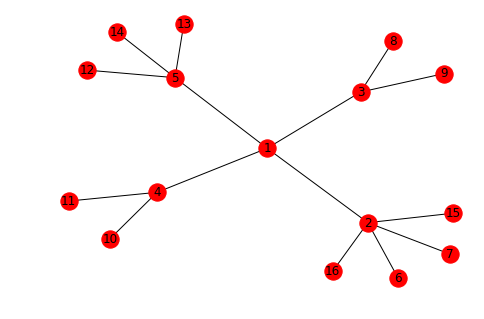

In [50]:
# you might also consider create a visualization to present the network
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


nx.draw(graph, with_labels = True)
plt.show()

#### 3.2.2. (2 pts) Report the degree of each node and plot a histogram to show the degree distribution of this network

In [51]:
# Your codes here - report degre and plot degree distribution histogram
for (node, val) in list(graph.degree()):
    print("The Degree for node",node,"is",val)


The Degree for node 1 is 4
The Degree for node 2 is 5
The Degree for node 3 is 3
The Degree for node 4 is 3
The Degree for node 5 is 4
The Degree for node 6 is 1
The Degree for node 7 is 1
The Degree for node 8 is 1
The Degree for node 9 is 1
The Degree for node 10 is 1
The Degree for node 11 is 1
The Degree for node 12 is 1
The Degree for node 13 is 1
The Degree for node 14 is 1
The Degree for node 15 is 1
The Degree for node 16 is 1


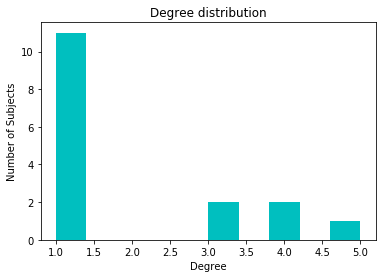

In [52]:
degrees = [val for (node,val) in graph.degree()]
plt.hist(degrees, color='c')
plt.xlabel('Degree')
plt.title('Degree distribution')
plt.ylabel('Number of Subjects')
plt.show()

#### 3.2.3. (4 pts) Which position is most influential in this network? Compute and compare three types of centrality (i.e. degree, betweenness and closeness centrality).  Discuss your findings.

In [53]:
# Your codes here
from networkx.algorithms import centrality as c

print("\nDegree Centrality")
for key,value in c.degree_centrality(graph).items():
    print(key,":",value)
    
print("\nBetweeness Centrality")
for key,value in c.betweenness_centrality(graph).items():
    print(key,":",value)

print("\nCloseness Centrality")
for key,value in c.closeness_centrality(graph).items():
    print(key,":",value)


Degree Centrality
1 : 0.26666666666666666
2 : 0.3333333333333333
3 : 0.2
4 : 0.2
5 : 0.26666666666666666
6 : 0.06666666666666667
7 : 0.06666666666666667
8 : 0.06666666666666667
9 : 0.06666666666666667
10 : 0.06666666666666667
11 : 0.06666666666666667
12 : 0.06666666666666667
13 : 0.06666666666666667
14 : 0.06666666666666667
15 : 0.06666666666666667
16 : 0.06666666666666667

Betweeness Centrality
1 : 0.7904761904761906
2 : 0.4761904761904762
3 : 0.2571428571428572
4 : 0.2571428571428572
5 : 0.37142857142857144
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0
10 : 0.0
11 : 0.0
12 : 0.0
13 : 0.0
14 : 0.0
15 : 0.0
16 : 0.0

Closeness Centrality
1 : 0.5769230769230769
2 : 0.46875
3 : 0.4166666666666667
4 : 0.4166666666666667
5 : 0.4411764705882353
6 : 0.32608695652173914
7 : 0.32608695652173914
8 : 0.3
9 : 0.3
10 : 0.3
11 : 0.3
12 : 0.3125
13 : 0.3125
14 : 0.3125
15 : 0.32608695652173914
16 : 0.32608695652173914


**Discussion:
The most influential position in the network is held by the node 1**

- Closeness centrality: Since the graph consists of clusters that are close to each other but far from other nodes as a whole in the network, we have groups of nodes that have similar closeness centrality values.  

- Betweenness centrality: 11 nodes have a betweenness centrality of 0 because they are all connected to a single node in their respective cluster. The 4 central nodes are further connected by node 1 which has the highest betweenness centrality. This is correct as without node 1, other 4 clusters have no way to connect with each other.

- Degree centrality: The degree centrality is the same for groups of nodes since the graph is made of multiple clusters.

From the centrality measures, i.e. degree centrality, closeness centrality and betweenness centrality, we can conclude that the position of ht epresident is the most influential in the given network. The position of the president has the highest betweenness centrality (0.79) indicating that the president has the maximum control over the network due to the amount of information that will pass through him. The high closeness centrality (0.57) for the president indicates that he is the most efficient in spreading the information throughout the network. Finally, the president also has a high degree centrality (0.266) indicating that he is connected to the most nodes in the network. Thus, through the combination of these three centrality measures, we can conclude that the president is the most influential position in the network. 

#### 3.2.4. Extra Credits ($\leq$ 4 pts): In general, find the density of an arbitrary formal hierarchy (e.g.  an organizational chart) as a function of organizational size. Justify your answer.

In [54]:
nx.density(graph)

0.125

**Justification :** Density is defined as mass/volume. For a network graph, number of nodes will be mass and the number of edges as volume. Thus the density of an undirected graph would be:

density = frac{2m}{n(n-1)}, [**where (n) is the number of nodes and (m) is the number of edges**]

For our graph the density would be d = (2 * 15) / (16 * 15) where the number of edges is 15 and the number of nodes is 16.
